[25.41111535 23.24940231 27.81679719]
expense:25.41
['h8', 'j10']
expense:23.25
['a1', 'b2', 'c3', 'd4', 'e5', 'f6', 'g7']
expense:27.82
['i9']


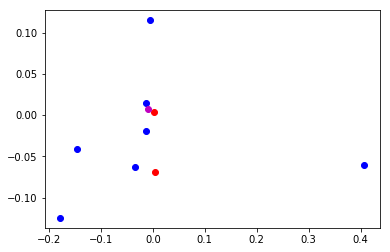

In [23]:
import numpy as np
from sklearn.cluster import KMeans as km
import matplotlib.pyplot as plt 

def load_data(filepath):
    f=open(filepath,'r+')#打开文件
    lines=f.readlines()#读取所有条目作为迭代类型,read,读取整个文件,readline,读取下一行,即跳过本条目
    data=[]
    name=[]
    for line in lines:
        items=line.strip().split('\t')#
        name.append(items[0])#每一条目的第一项为城市名,
        data.append([float(items[i]) for i in range(1,len(items))])#第二项至最后一项为消费条目数据,共len(items)个条目
        
    return data,name

def showCluster(dataSet,k,centers,clusterAssignment):#数据集,聚类中心数,聚类中心,聚类结果
    numSamples,dim=dataSet.shape#行,列
    mark=['or','ob','om']#4个聚类中心
    #draw all samples
    for i in range(numSamples):#对于每一行
        markIndex=int(clusterAssignment[i])#数据所属的类,1,2,3或4
        plt.plot(dataSet[i,0],dataSet[i,1],mark[markIndex])#画出样本点,以第一列为横坐标,第二列为纵坐标
    mark=['Dr','Db','Dm']
    #draw the centroids,
    for i in range(k):
        plt.plot(centers[i,0],centers[i,1],mark[i],markersize=17)#画出聚类中心
    plt.show()

def main():
    data,name=load_data('C:\\Users\\hzg0601\\Desktop\\other\\city.txt')
    #print(data)
    #print(len(data))
    k_m=km(n_clusters=3)#设置聚类中心个数,  
    label=k_m.fit_predict(data)
    expense=np.sum(k_m.cluster_centers_,axis=1)#计算行均值
    print(expense)
    citycluster=[[],[],[]]
    for i in range(len(name)):
        citycluster[label[i]].append(name[i])
    for i in range(len(citycluster)):
        print('expense:%.2f' % expense[i])
        print(citycluster[i])
    data=np.array(data).reshape(len(data),len(data[0]))
    showCluster(data,3,k_m.cluster_centers_,label)
        
if __name__=='__main__':
    main()
        


In [5]:
#KMeans(n_clusters=8, init=’k-means++’,
#n_init=10, max_iter=300, tol=0.0001, precompute_distances=’auto’, 
#verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm=’auto’) 

#init : {‘k-means++’, ‘random’ or an ndarray},初始化种子的方法,默认为k-means
#n_init:对于每组初始化种子,算法运行的次数
#precompute_distances : {‘auto’, True, False},‘auto’ : do not precompute distances if n_samples * n_clusters > 12 million.
#random_state : int, RandomState instance or None, optional, default: None
    #If int, random_state is the seed used by the random number generator; 
    #If RandomState instance, random_state is the random number generator;
    #If None, the random number generator is the RandomState instance used by np.random.
#copy_x : boolean, default True,如果预计算距离,则优先精确计算数据的中心
#n_jobs : int,并发计算参数,如果是-1则使用所有cpu核心,如果为1,则不采用并发计算,如n_jobs小于-1,则使用n_cpu+1+n_jobs
#algorithm : “auto”, “full” or “elkan”, default=”auto”
    #The classical EM-style algorithm is “full”. 
    #The “elkan” variation is more efficient by using the triangle inequality, but currently doesn’t support sparse data. 
    #“auto” chooses “elkan” for dense data and “full” for sparse data.
    
#attributes:
    #cluster_centers_ : array, [n_clusters, n_features],Coordinates of cluster centers

    #labels_ : :Labels of each point

    #inertia_ : float,Sum of squared distances of samples to their closest cluster center.

#method:
    #fit(X[, y])	Compute k-means clustering.
    #fit_predict(X[, y])	Compute cluster centers and predict cluster index for each sample.
    #fit_transform(X[, y])	Compute clustering and transform X to cluster-distance space.
    #get_params([deep])	Get parameters for this estimator.
    #predict(X)	Predict the closest cluster each sample in X belongs to.
    #score(X[, y])	Opposite of the value of X on the K-means objective.
    #set_params(**params)	Set the parameters of this estimator.
    #transform(X)	Transform X to a cluster-distance space.

In [9]:
import numpy as np
a=np.array([1,2,3,4,5,6]).reshape(2,3)
a

array([[1, 2, 3],
       [4, 5, 6]])

In [11]:
np.mean(a,axis=1)

array([2., 5.])

In [1]:
#DBSCAN密度聚类
#把数据点分为三类:
    #核心点,在半径Eps内含有超过MinPts数目的点
    #边界点,在半径Eps内点的数量小于MinPts,但是落在核心点的邻域内
    #噪音点,其余.
#算法流程:
    #将所有点标记为核心点,边界点或噪声点
    #删除噪声点
    #为距离在Eps内的所有核心点之间赋予一条边
    #每组连通的核心点形成一个簇
    #将每个边界点指派到一个与之关联的核心点的簇中(从属某个核心点的半径范围之内)
#DBSCAN主要参数:
    #eps:两个样本被视为邻节点的最大距离
    #min_samples:簇的样本数
    #metric:距离计算方式
    #例,sklearn.cluster.DBSCAN(eps=0.5,min_sample=5,metric='euclidean')#欧式距离

In [ ]:
import numpy as np
import sklearn.cluster as skc
from sklearn import metrics
import matplotlib.pyplot as plt

mac2id=dict()
onlinetimes=[]
f=open('data.txt')
for line in f:
    mac=line.split(',')[2]
    onlinetime=int(line.split(',')[6])
    starttime=int(line.split(',')[4].split(' ')[1].split(':')[0])#读取每条的mac地址,开始上网时长
    if mac not in mac2id:
        mac2id[mac]=len(onlinetimes)#键是mac地址,值为时长
        onlinetimes.append((starttime,onlinetime))#时长由开始时间与时长组成
    else:
        onlinetimes[mac2id[mac]]=[(starttime,onlinetime)]#值是上网开始时间,和时长
real_X=np.array(onlinetimes).reshape((-1,2))#把数据变成x行2列,即如果不知道原数据结构,则可以-1为为通配符,python自动匹配剩余维度

#以开始上网时间为目标聚类

X=real_X[:,0:1]#保持行不变,取出第一列
db=skc.DBSCAN(eps=0.01,min_smaples=20).fit(X)#以第一列即开始上网时间进行聚类
labels=db.labels
print('Labels:')
print(labels)
ratio=len(labels[labels[:]==-1])/len(labels)#取出所有离散点(值为-1)的作为新数组,计算其长度,从而计算噪音点的比例
print('Noise ratio:',format(ratio,'.2%'))

n_centers_=len(set(labels))-(1 if -1 in labels else 0)#set取集合,即类的个数,如果有噪音点,-1作为中心的个数,否则-0
print('estimate number of clusters: %d' %n_clusters_)#
print('silhouette coefficient: %0.3f' % metrics.silhouette_score(X,labels))#计算所有样本的轮廓系数的平均值

for i in range(n_clusters_):
    print('Cluster ',i,':')
    print(list(X[labels==i].flatten()))#把数组降到一维,按行排序
plt.hist(X,24)#横轴的长度,24+1

#plt.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid',
#orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, hold=None, data=None, **kwargs)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
a=np.array([1,2,3,4,5,6]).reshape(2,-1)
print(a)
a[:,0:2]
a.flatten()

[[1 2 3]
 [4 5 6]]


array([1, 2, 3, 4, 5, 6])

In [22]:
plt.hist?